In [3]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
from pandas_profiling import ProfileReport
from IPython.display import IFrame
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
%matplotlib inline
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cm_mostrar

In [20]:
data = pd.read_excel("./dataset_air_quality.xlsx")
print("---------------------------------------------------------------------")
print("Información del conjunto de datos")
print("---------------------------------------------------------------------")
#El método describe(), permite obtener una descripción de los datos que vamos a trabajar.
print(data.describe(),"\n")
#El info(), imprime información sobre el dataset, incluidos columnas, cantidad de valores no nulos, tipo de dato y el uso de memoria. 
data.info()

---------------------------------------------------------------------
Información del conjunto de datos
---------------------------------------------------------------------
                 A            B            C            D            E
count  3787.000000  3787.000000  3787.000000  3787.000000  3787.000000
mean      1.001982     0.018184     0.019268    96.150820    20.845877
std       0.860346     0.009354     0.015717    58.035761    28.069301
min       0.030000     0.000450     0.001000     7.790000     0.000000
25%       0.460500     0.011650     0.005770    58.348000    13.945000
50%       0.741000     0.016930     0.016070    80.560000    17.208000
75%       1.245000     0.023220     0.028000   114.675000    21.745000
max       7.740000     0.067380     0.093030   567.760000   499.790000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


---------------------------------------------------------------------
Caracterización del conjunto de datos (dataset)
---------------------------------------------------------------------
1. Las clases de la variable objetivo son:

 ['moderada' 'dañina a la salud para grupos sensibles' 'dañina a la salud'
 'peligrosa' 'muy dañina a la salud' 'buena' 'fatal'] 

2. El número de clases de la variable objetivo es: 7 

2.1. Representación y tipo de valor (variable objetivo):

                                     Clases  N. de instancias  Tipo de valor
0                                 moderada              3013  <class 'str'>
1  dañina a la salud para grupos sensibles               489  <class 'str'>
2                                    buena               136  <class 'str'>
3                        dañina a la salud               121  <class 'str'>
4                                    fatal                14  <class 'str'>
5                    muy dañina a la salud                 9  <clas

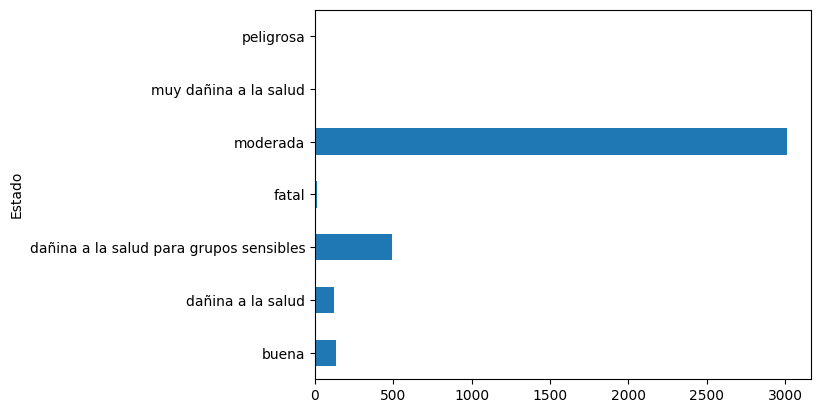

In [21]:
#Número de clases de la variable objetivo, con su representación y el tipo de valor que toman.
print("---------------------------------------------------------------------")
print("Caracterización del conjunto de datos (dataset)")
print("---------------------------------------------------------------------")
print("1. Las clases de la variable objetivo son:\n\n",data['Estado'].unique(),"\n")
variableOb = data['Estado'].value_counts()
print("2. El número de clases de la variable objetivo es: {} \n".format(len(variableOb)))
lista = list(variableOb.keys())

df = pd.DataFrame([[lista[0], variableOb[0], type(lista[0])],
                  [lista[1], variableOb[1], type(lista[1])],
                  [lista[2], variableOb[2], type(lista[2])],
                  [lista[3], variableOb[3], type(lista[3])],
                  [lista[4], variableOb[4], type(lista[4])],
                  [lista[5], variableOb[5], type(lista[5])],
                  [lista[6], variableOb[6], type(lista[6])]],
                  columns = ["Clases", "N. de instancias", "Tipo de valor"])
print("2.1. Representación y tipo de valor (variable objetivo):\n\n",df,"\n")

# Número de instancias en total. La función Shape me devuelve una tupla con la cantidad de filas y columnas (x,y), solo escogeré "x" que se interpeta por instancias del conjunto de datos
print("3. El número de instancias en total del datset cargado es:",data.shape[0],"\n")

#Número de instancias pertenecientes a cada clase
print("4. Número de instancias de cada clase de la variable la objetivo:\n")
df2 = pd.DataFrame([[lista[0], variableOb[0]],
                   [lista[1], variableOb[1]],
                   [lista[2], variableOb[2]],
                   [lista[3], variableOb[3]],
                   [lista[4], variableOb[4]],
                   [lista[5], variableOb[5]],
                   [lista[6], variableOb[6]]],
                    columns = ["Clases", "N. de instancias"])
print(df2,"\n")

# Número de atributos de entrada con su representación y tipo de valor que toman.
print("5. El número total de atributos de entrada es: {}".format(data.columns.value_counts().sum() - 1),"\n")
df3 = pd.DataFrame(
    [[data.columns[0], "CO", type(data[data.columns[0]][0])],
    [data.columns[1], "NO2", type(data[data.columns[1]][0])],
    [data.columns[2], "O3", type(data[data.columns[2]][0])],
    [data.columns[3], "PM10", type(data[data.columns[3]][0])],
    [data.columns[4], "PM2_5", type(data[data.columns[4]][0])]],
    columns = ["Atributo", "Representación", "Tipo de valor"])
print("5.1. Representación y tipo de valor (vaiables entrada):\n\n",df3,"\n")

#Me devuelve el total de valores faltantes en cada variable del conjunto de datos o dataset si es que los tuviere
print("6. No se muestran valores faltantes para ninguna de las variables:")
print(data.isnull().sum())

# Visualizar un gráfico de barras de la variable class
data.groupby("Estado")["Estado"].count().plot(kind="barh")
print("\n7. Gráfica N.instancias de cada clase de la variable la objetivo:\n")
plt.show()

In [22]:
# Seleccion de variables de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=["Estado", ], axis=1),data["Estado"], test_size=0.20, random_state=1, shuffle=True)

In [23]:
#Código de ajuste del modelo Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 70)
dtc.fit(X_train, y_train)

# Realizamos predicciones
predicted_dtc = dtc.predict(X_test)

In [25]:
#Código para mostrar la evaluación del modelo Decision Tree Classifier
print("---------------------------------------------------------------------")
print("Algoritmo de clasificación implementado: Decision Tree Classifier")
print("---------------------------------------------------------------------\n")
mostrar1 = round(100 * metrics.accuracy_score(y_test, predicted_dtc),7)
print ("1. Puntaje de precisión con DTC, porcentaje de instancias clasificadas correctamente:",mostrar1,"\n")
print ("2. Puntaje de precisión con DTC, porcentaje de instancias clasificadas incorrectamente: {}".format(round(100 - mostrar1, 7)),"\n")
print ("3. Cálculo de tasa de falsos positivos (FP Rate):\n")
matrizc_1 = metrics.confusion_matrix(y_test,predicted_dtc)

fpr_1 = round(matrizc_1[1][0] / (matrizc_1[1][0] + matrizc_1[1][1] + matrizc_1[1][2]+ matrizc_1[1][3] + matrizc_1[1][1][4] + matrizc_1[1][1][5] + matrizc_1[1][1][6]+
                                 matrizc_1[2][0] + matrizc_1[2][1] + matrizc_1[2][2]+ matrizc_1[2][3] + matrizc_1[2][4] + matrizc_1[2][5] + matrizc_1[2][6] +
                                 matrizc_1[3][0] + matrizc_1[3][1] + matrizc_1[3][2]+ matrizc_1[3][3] + matrizc_1[3][4] + matrizc_1[3][5] + matrizc_1[3][6] +
                                 matrizc_1[4][0] + matrizc_1[4][1] + matrizc_1[4][2]+ matrizc_1[4][3] + matrizc_1[4][4] + matrizc_1[4][5] + matrizc_1[4][6] +
                                 matrizc_1[5][0] + matrizc_1[5][1] + matrizc_1[5][2]+ matrizc_1[5][3] + matrizc_1[5][4] + matrizc_1[5][5] + matrizc_1[5][6] +
                                 matrizc_1[6][0] + matrizc_1[6][1] + matrizc_1[6][2]+ matrizc_1[6][3] + matrizc_1[6][4] + matrizc_1[6][5] + matrizc_1[6][6] ),7)
print("   FP Rate para clase acc:",fpr_1)
fpr_2 = round(matrizc_1[2][0] / (matrizc_1[2][0] + matrizc_1[2][1] + matrizc_1[2][2]+ matrizc_1[2][3] +
                                 matrizc_1[3][0] + matrizc_1[3][1] + matrizc_1[3][2]+ matrizc_1[3][3] +
                                 matrizc_1[0][0] + matrizc_1[0][1] + matrizc_1[0][2]+ matrizc_1[0][3]),4)
print("   FP Rate para clase good:",fpr_2)
fpr_unacc1 = round(matrizc_1[3][0] / (matrizc_1[3][0] + matrizc_1[3][1] + matrizc_1[3][2]+ matrizc_1[3][3] +
                                 matrizc_1[0][0] + matrizc_1[0][1] + matrizc_1[0][2]+ matrizc_1[0][3] +
                                 matrizc_1[1][0] + matrizc_1[1][1] + matrizc_1[1][2]+ matrizc_1[1][3]),4)
print("   FP Rate para clase unacc:",fpr_unacc1)
fpr_vgood1 = round(1 / (matrizc_1[0][0] + matrizc_1[0][1] + matrizc_1[0][2]+ matrizc_1[0][3] +
                                 matrizc_1[1][0] + matrizc_1[1][1] + matrizc_1[1][2]+ matrizc_1[1][3] +
                                 matrizc_1[2][0] + matrizc_1[2][1] + matrizc_1[2][2]+ matrizc_1[2][3]),4)
print("   FP Rate para clase unacc:",fpr_vgood1)
print("\n3. Matriz de confusión para DTC:\n")
print(format(matrizc_1),"\n")

---------------------------------------------------------------------
Algoritmo de clasificación implementado: Decision Tree Classifier
---------------------------------------------------------------------

1. Puntaje de precisión con DTC, porcentaje de instancias clasificadas correctamente: 99.4723 

2. Puntaje de precisión con DTC, porcentaje de instancias clasificadas incorrectamente: 0.5277 

3. Cálculo de tasa de falsos positivos (FP Rate):

   FP Rate para clase acc: 0.0
   FP Rate para clase good: 0.0
   FP Rate para clase unacc: 0.0
   FP Rate para clase unacc: 0.0075

3. Matriz de confusión para DTC:

[[ 26   0   0   0   1   0   0]
 [  0  26   0   0   0   0   0]
 [  0   0  81   0   0   0   0]
 [  0   0   0   2   0   0   0]
 [  2   0   0   0 617   0   0]
 [  0   0   0   0   0   2   0]
 [  0   0   0   1   0   0   0]] 



In [42]:
#df= pd.DataFrame([{"CO":0.341935486,"NO2":2.061290264,"O3":0,"PM10":7,"PM2_5":7}]) 
#df= pd.DataFrame([{"CO":1.773,"NO2":0.02617,"O3":0.00342,"PM10":109.9,"PM2_5":25.626}])
#df= pd.DataFrame([{"CO":1.751,"NO2":0.02195,"O3":0.00392,"PM10":165.4,"PM2_5":28.443}])
df= pd.DataFrame([{"CO":0.732,"NO2":0.024,"O3":0.01,"PM10":76.012,"PM2_5":498.57}])

print(df)
resultado_dtc = dtc.predict(df.values)
print ("MODELO DECISION TREE CLASSIFIER / ESTADO DEL AIRE: "+resultado_dtc[0])


      CO    NO2    O3    PM10   PM2_5
0  0.732  0.024  0.01  76.012  498.57
MODELO DECISION TREE CLASSIFIER / ESTADO DEL AIRE: fatal
MODELO RANDOM FOREST CLASSIFIER / ESTADO DEL AIRE: fatal


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Clasificación de los datos con el Modelo Decision Tree Classifier
def brain(data_classify):
    df = pd.DataFrame(data_classify)
    response = dtc.predict(df.values)
    return response[0]